<a href="https://colab.research.google.com/github/annaluizacaraciolo/DeepLearning2023/blob/main/ListaPraticaMLPConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LISTA PRÁTICA DAS UNIDADES 1 E 2**

Pode ser feita com o grupo do projeto. Recomendo pair/group programming para que todos vejam um pouco de todas as partes.


Treine e avalie 4 modelos de classificação para a base de dados de "handwritten digits" do MNIST https://en.wikipedia.org/wiki/MNIST_database.



1.   Um modelo base que não seja uma rede neural, como _decision tree, xgboost, random forest_, etc. Recomendação: use o sklearn (https://scikit-learn.org/).

2.   Uma MLP

3. Uma rede convolucional criada por ti. Recomendação: https://pytorch.org/

4. Use um modelo pre treinado já consolidado na literatura para fazer _transfer learning_. Recomendações: https://pytorch.org/hub/pytorch_vision_vgg/


Compare os resultados dos modelos:
* plote gráficos que mostrem as acurácias de cada modelo
* indique para cada modelo qual foi o digito mais dificil de classificar (indique qual métrica usou para concluir isso)
* argumente qual o melhor modelo levando em consideração o tempo de execução e acurácia.

Recomendação use:
https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html .



# Imports e Downloads

In [1]:
!pip install torch -q
!pip install torchvision -q

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 37420535.03it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 115477305.84it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 60108393.20it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18023206.02it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



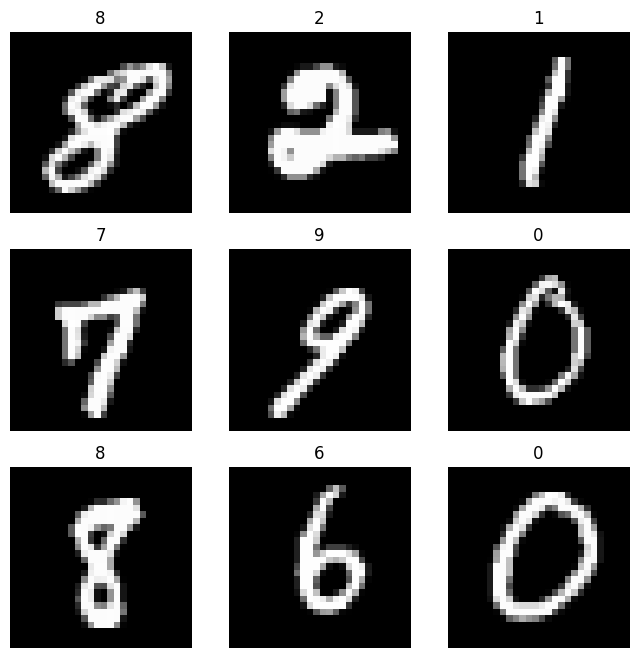

In [6]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = 64,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = 64,
                                      shuffle = False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


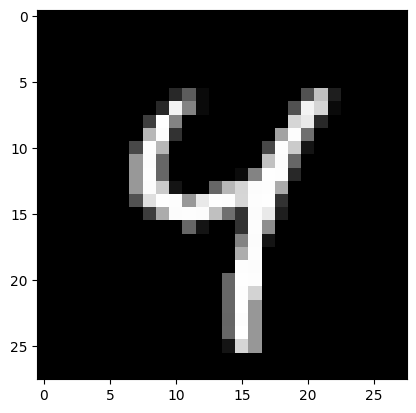

Label: 4


In [8]:
# Display image and label.
train_features, train_labels = next(iter(train_gen))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Modelo base

In [ ]:
from sklearn.ensemble import RandomForestClassifier

nsamples, nx, ny, nrgb = train_features.shape
x_train = train_features.reshape((nsamples, nx*ny*nrgb))

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, train_labels)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
test_features, test_labels = next(iter(test_gen))
nsampes_test, nx_test, ny_test, nrgb_test = test_features.shape
x_test = test_features.reshape((nsampes_test, nx_test*ny_test*nrgb_test))
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([7, 2, 1, 0, 9, 1, 9, 7, 6, 9, 0, 6, 9, 0, 1, 5, 7, 7, 3, 4, 9, 6,
       6, 8, 7, 0, 7, 4, 0, 1, 3, 7, 3, 6, 7, 2, 7, 1, 8, 1, 1, 7, 1, 1,
       3, 3, 7, 7, 4, 4, 6, 3, 7, 3, 2, 0, 4, 1, 9, 7, 7, 8, 7, 9])

### Scores

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, test_labels)

0.63

In [ ]:
print(classification_report(y_pred, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      1.00      0.92        12
           2       0.25      0.67      0.36         3
           3       0.64      0.70      0.67        10
           4       0.14      1.00      0.25         2
           5       0.14      0.50      0.22         2
           6       1.00      0.71      0.83        14
           7       0.80      0.80      0.80        15
           8       0.50      0.09      0.15        11
           9       0.73      0.38      0.50        21

    accuracy                           0.63       100
   macro avg       0.61      0.67      0.56       100
weighted avg       0.75      0.63      0.65       100



# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(x_train, train_labels)

In [ ]:
predictions = clf_mlp.predict(x_test)
predictions

array([7, 2, 1, 0, 2, 1, 9, 6, 2, 9, 0, 6, 4, 0, 1, 5, 7, 7, 3, 4, 9, 6,
       6, 8, 4, 0, 7, 4, 0, 1, 3, 1, 3, 2, 7, 2, 7, 1, 8, 1, 1, 7, 9, 2,
       3, 5, 8, 2, 9, 2, 6, 3, 0, 3, 2, 8, 4, 1, 9, 7, 7, 8, 9, 9])

Visualizando algumas da predictions

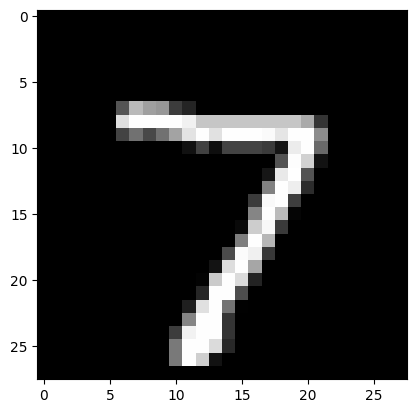

Prediction: 7


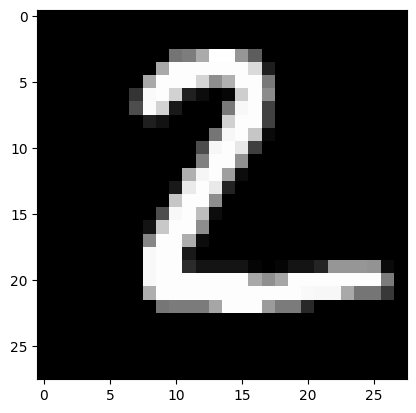

Prediction: 2


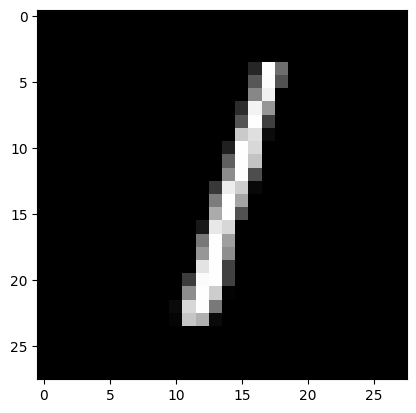

Prediction: 1


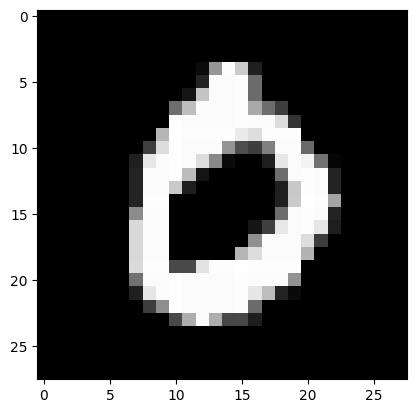

Prediction: 0


In [ ]:
for i in range(len(predictions)):
  img = test_features[i].squeeze()
  label = predictions[i]
  plt.imshow(img, cmap="gray")
  plt.show()
  print(f"Prediction: {label}")

  if i == 3: break

In [ ]:
clf_mlp.score(x_test, test_labels)

0.703125

# Rede Convolucional

In [9]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 64 # the size of input data took for one iteration
lr = 1e-3 # size of step

In [10]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [11]:
net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [ ]:
print(torch.__version__, torch.cuda.is_available())

2.0.1+cu118 True


In [12]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

### Training

**Colocar ambiente de GPU para fazer funcionar**

In [13]:
for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.data))

Epoch [1/20], Step [100/937], Loss: 0.2576
Epoch [1/20], Step [200/937], Loss: 0.3365
Epoch [1/20], Step [300/937], Loss: 0.2208
Epoch [1/20], Step [400/937], Loss: 0.1490
Epoch [1/20], Step [500/937], Loss: 0.0602
Epoch [1/20], Step [600/937], Loss: 0.1089
Epoch [1/20], Step [700/937], Loss: 0.2402
Epoch [1/20], Step [800/937], Loss: 0.0667
Epoch [1/20], Step [900/937], Loss: 0.2045
Epoch [2/20], Step [100/937], Loss: 0.1354
Epoch [2/20], Step [200/937], Loss: 0.0424
Epoch [2/20], Step [300/937], Loss: 0.1209
Epoch [2/20], Step [400/937], Loss: 0.0426
Epoch [2/20], Step [500/937], Loss: 0.1206
Epoch [2/20], Step [600/937], Loss: 0.0929
Epoch [2/20], Step [700/937], Loss: 0.1246
Epoch [2/20], Step [800/937], Loss: 0.1669
Epoch [2/20], Step [900/937], Loss: 0.1468
Epoch [3/20], Step [100/937], Loss: 0.0372
Epoch [3/20], Step [200/937], Loss: 0.0290
Epoch [3/20], Step [300/937], Loss: 0.2776
Epoch [3/20], Step [400/937], Loss: 0.0670
Epoch [3/20], Step [500/937], Loss: 0.0927
Epoch [3/20

Salvando a rede

In [14]:
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

Para resolver eventuais problemas de ter CPU e GPU executando informações

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [19]:
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

### Testing

In [26]:
correct = 0
total = 0

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(test_gen):
    images = Variable(images.view(-1,28*28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)
    #loss = loss_function(outputs, labels)
    #loss.backward()
    #optimizer.step()

     # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

    #if (i+1) % 100 == 0:
      #print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'%(epoch+1, num_epochs, i+1, len(test_data)//batch_size, loss.data))
print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 98 %


# Rede Convolucional consolidada

Novo código

In [ ]:
class VGG11(nn.Module):
    def __init__(self, in_channels, num_classes=1000):
        super(VGG11, self).__init__()
        self.in_channels = in_channels
        self.num_classes = num_classes
        # convolutional layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(self.in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # fully connected linear layers
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout2d(0.5),
            nn.Linear(in_features=4096, out_features=self.num_classes)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        # flatten to prepare for the fully connected layers
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

matplotlib.style.use('ggplot')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")
epochs = 10
batch_size = 32

# our transforms will differ a bit from the VGG paper
# as we are using the MNIST dataset, so, we will directly resize...
# ... the images to 224x224 and not crop them and we will not use...
# ... any random flippings also
train_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5), std=(0.5))])
valid_transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0.5), std=(0.5))])

# training dataset and data loader
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                             download=True,
                                             transform=train_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True)
# validation dataset and dataloader
valid_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True,
                                           transform=valid_transform)
valid_dataloader = torch.utils.data.DataLoader(valid_dataset,
                                             batch_size=batch_size,
                                             shuffle=False)

# instantiate the model
model = VGG11(in_channels=1, num_classes=10).to(device)
# total parameters and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"[INFO]: {total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"[INFO]: {total_trainable_params:,} trainable parameters.")

# the loss function
criterion = nn.CrossEntropyLoss()
# the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9,
                      weight_decay=0.0005)

# training
def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1

        image, labels = data
        image = image.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        loss.backward()
        optimizer.step()

    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

# validation
def validate(model, testloader, criterion):
    model.eval()

    # we need two lists to keep track of class-wise accuracy
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1

            image, labels = data
            image = image.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(image)
            # calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

            # calculate the accuracy for each class
            correct  = (preds == labels).squeeze()
            for i in range(len(preds)):
                label = labels[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1

    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))

    # print the accuracy for each class after evey epoch
    # the values should increase as the training goes on
    print('\n')
    for i in range(10):
        print(f"Accuracy of digit {i}: {100*class_correct[i]/class_total[i]}")

    return epoch_loss, epoch_acc

# start the training
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
for epoch in range(epochs):
    print(f"[INFO]: Epoch {epoch+1} of {epochs}")

    train_epoch_loss, train_epoch_acc = train(model, train_dataloader,
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc = validate(model, valid_dataloader,
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)

    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}")

    print('-'*50)

# save the trained model to disk
torch.save({
            'epoch': epochs,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': criterion,
            }, '../outputs/model.pth')

# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_acc, color='green', linestyle='-',
    label='train accuracy'
)
plt.plot(
    valid_acc, color='blue', linestyle='-',
    label='validataion accuracy'
)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('../outputs/accuracy.jpg')
plt.show()
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-',
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-',
    label='validataion loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('../outputs/loss.jpg')
plt.show()

print('TRAINING COMPLETE')

Código anterior

In [ ]:
class VGG(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(7 * 7 * 128, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = VGG(num_classes=10)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
total_correct = 0
total_samples = 0
accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_gen:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    accuracy_train = total_correct / total_samples
    accuracies.append(accuracy_train)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss/len(train_gen):.4f}')




Epoch 1/10, Loss: 0.1542
Epoch 2/10, Loss: 0.0498
Epoch 3/10, Loss: 0.0363
Epoch 4/10, Loss: 0.0266
Epoch 5/10, Loss: 0.0243
Epoch 6/10, Loss: 0.0195
Epoch 7/10, Loss: 0.0169
Epoch 8/10, Loss: 0.0153
Epoch 9/10, Loss: 0.0127
Epoch 10/10, Loss: 0.0112


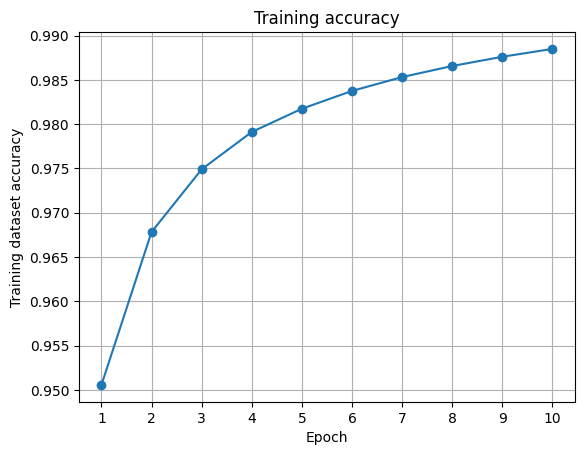

In [ ]:
plt.figure()
plt.plot(range(1, num_epochs + 1), accuracies, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training dataset accuracy')
plt.title('Training accuracy')
plt.grid(True)
plt.xticks(range(1, num_epochs + 1))
plt.show()

In [ ]:
model.eval()

total_correct = 0
total_samples = len(test_data)

with torch.no_grad():
    for inputs, labels in test_gen:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()

accuracy = total_correct / total_samples
print(f'Acurácia no conjunto de validação: {accuracy:.4f}')


Acurácia no conjunto de validação: 0.9927


# Comparação

In [34]:
import seaborn as sns
import pandas as pd

In [43]:
accuracies = np.array([0.63, 0.70, 0.98, 0.99])
labels = ["Random forest", "MLP", "CNN", "Consolidada"]

In [41]:
testing_df = pd.DataFrame( {
    "Acurácia": [0.63, 0.70, 0.98, 0.99]
  }, index=["Random forest", "MLP", "CNN", "Consolidada"]
)
testing_df

,Acurácia
Random forest,0.63
MLP,0.70
CNN,0.98
Consolidada,0.99


<Axes: ylabel='Acurácia'>

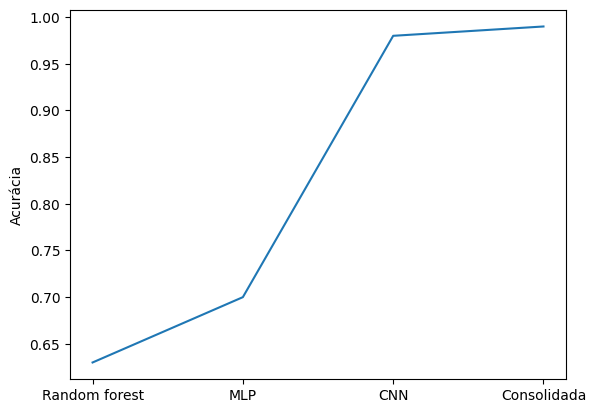

In [44]:
sns.lineplot(data=testing_df, x=labels, y='Acurácia')